# a notebook to figure out some plotting stuff
- for example, a strikezone view of the pitches when they cross the plate
- 3d trails if I can figure that out

In [19]:
from pybaseball import statcast
from pybaseball import playerid_reverse_lookup
from pybaseball import statcast_batter, spraychart

import datetime
import pandas as pd
import matplotlib.pyplot as plt


In [23]:
# this defaults to yesterday
#end_dt = '2023-03-30'
# remember this will be utc 
end_dt = str(datetime.date.today() + datetime.timedelta(days=-1))


df = statcast(start_dt=end_dt, end_dt=end_dt)

print(df.shape)

This is a large query, it may take a moment to complete


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  1.20it/s]

(4526, 92)


In [3]:
df.head()

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1871,FS,2023-03-30,87.0,-0.32,6.82,"Bautista, Félix",594807,642585,strikeout,swinging_strike,...,10,10,9,9,10,Standard,Strategic,230,-0.142,<NA>
1927,FF,2023-03-30,99.3,-0.29,6.91,"Bautista, Félix",594807,642585,NaN,foul,...,10,10,9,9,10,Standard,Strategic,189,0.0,<NA>
1979,FF,2023-03-30,97.5,-0.24,6.88,"Bautista, Félix",594807,642585,NaN,called_strike,...,10,10,9,9,10,Standard,Standard,187,0.0,<NA>
2074,FF,2023-03-30,96.9,-0.52,6.85,"Bautista, Félix",807799,642585,force_out,hit_into_play,...,10,10,9,9,10,Standard,Standard,187,-0.051,<NA>
2109,FF,2023-03-30,97.5,-0.56,6.88,"Bautista, Félix",807799,642585,NaN,swinging_strike,...,10,10,8,8,10,Standard,Standard,188,0.0,<NA>


In [7]:
a_pitch = df.loc[1]

In [8]:
a_pitch

pitch_type                                FF
game_date                2023-03-30 00:00:00
release_speed                           96.7
release_pos_x                          -2.02
release_pos_z                           5.94
                                ...         
if_fielding_alignment               Standard
of_fielding_alignment               Standard
spin_axis                                220
delta_home_win_exp                       0.0
delta_run_exp                           <NA>
Name: 1, Length: 92, dtype: object

In [22]:
a_pitch.game_pk

718773

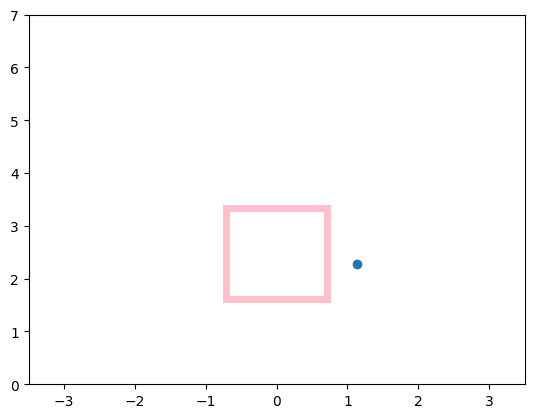

In [9]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#define Matplotlib figure and axis
fig, ax = plt.subplots()

#create simple line plot
ax.plot(a_pitch["plate_x"], a_pitch["plate_z"], 'o')

#add rectangle to plot
ax.add_patch(Rectangle((-0.71, a_pitch["sz_bot"]), 2*0.71, a_pitch["sz_top"] - a_pitch["sz_bot"],
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
             lw=5))


ax.set_xlim(-3.5, 3.5)
ax.set_ylim(0, 7)

#display plot
plt.show()

In [12]:
# Do this again, but for all pitches

all_pitches = df[df.pitcher == 642585]
# here is the game that he pitched in https://www.youtube.com/watch?v=r5-DFUnWevY

In [13]:
all_pitches

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
1871,FS,2023-03-30,87.0,-0.32,6.82,"Bautista, Félix",594807,642585,strikeout,swinging_strike,...,10,10,9,9,10,Standard,Strategic,230,-0.142,<NA>
1927,FF,2023-03-30,99.3,-0.29,6.91,"Bautista, Félix",594807,642585,NaN,foul,...,10,10,9,9,10,Standard,Strategic,189,0.0,<NA>
1979,FF,2023-03-30,97.5,-0.24,6.88,"Bautista, Félix",594807,642585,NaN,called_strike,...,10,10,9,9,10,Standard,Standard,187,0.0,<NA>
2074,FF,2023-03-30,96.9,-0.52,6.85,"Bautista, Félix",807799,642585,force_out,hit_into_play,...,10,10,9,9,10,Standard,Standard,187,-0.051,<NA>
2109,FF,2023-03-30,97.5,-0.56,6.88,"Bautista, Félix",807799,642585,NaN,swinging_strike,...,10,10,8,8,10,Standard,Standard,188,0.0,<NA>
2153,FF,2023-03-30,97.8,-0.47,6.87,"Bautista, Félix",807799,642585,NaN,ball,...,10,10,8,8,10,Standard,Standard,191,0.0,<NA>
2282,FS,2023-03-30,88.1,-0.81,6.83,"Bautista, Félix",807799,642585,NaN,ball,...,10,10,8,8,10,Standard,Standard,221,0.0,<NA>
2326,FF,2023-03-30,97.8,-0.69,6.8,"Bautista, Félix",807799,642585,NaN,ball,...,10,10,8,8,10,Standard,Standard,190,0.0,<NA>
2446,FF,2023-03-30,97.9,-0.47,6.84,"Bautista, Félix",807799,642585,NaN,called_strike,...,10,10,8,8,10,Standard,Standard,188,0.0,<NA>
2532,FS,2023-03-30,85.6,-0.42,6.8,"Bautista, Félix",457759,642585,single,hit_into_play,...,10,10,8,8,10,Standard,Standard,233,0.069,<NA>


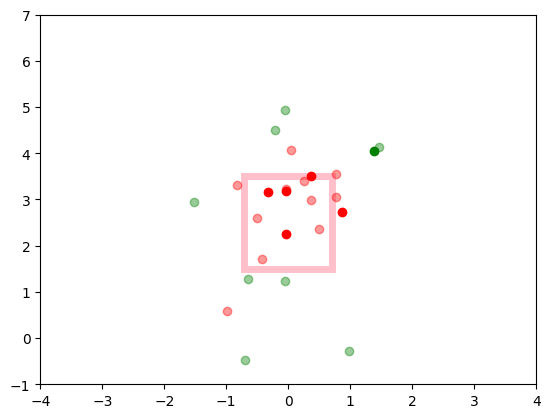

In [17]:
#define Matplotlib figure and axis
fig, ax = plt.subplots()



for row in all_pitches.iterrows():
    row = row[1]
    ax.plot(row["plate_x"],
            row["plate_z"],
            'o',
            alpha = 0.4 if pd.isna(row["events"]) else 1,
            color = "green" if row["description"] == "ball" else "red")

#add strike zone to plot
ax.add_patch(Rectangle((-0.71, 1.5), 2*0.71, 2,
             edgecolor = 'pink',
             facecolor = 'blue',
             fill=False,
             lw=5))

ax.set_xlim(-4, 4)
ax.set_ylim(-1, 7)


plt.show()

## Quick things to make this better
- turn into a function
- different colors for different pitch types
- draw a plate?
- markers that show speed and type
- maybe movement with like a empty circle, vector, filled circle